<a href="https://colab.research.google.com/github/adrianacupp/NLP_with_Transformers/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch Kaggle dataset into Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d rmisra/news-category-dataset

 94% 25.0M/26.5M [00:01<00:00, 27.0MB/s]
100% 26.5M/26.5M [00:01<00:00, 20.1MB/s]


In [5]:
!ls

kaggle.json  news-category-dataset.zip


In [6]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


#Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [34]:
# Specify the file path
file_path = "/content/gdrive/My Drive/Kaggle/News_Category_Dataset_v3.json"

In [48]:
news_dataset = pd.read_json(file_path , lines=True)

In [49]:
news_dataset.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


#EDA

In [50]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [51]:
news_dataset.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [52]:
news_dataset.category.value_counts().sort_values(ascending=False)

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

Merge similar categories

In [53]:
len(news_dataset.category.unique())

42

In [54]:
news_dataset.category = news_dataset.category.replace({"HEALTHY LIVING": "WELLNESS",
                                                       "SPORTS":"WELLNESS",
                                                       "QUEER VOICES": "GROUPS VOICES",
                                                       "BLACK VOICES": "GROUPS VOICES",
                                                       "LATINO VOICES": "GROUPS VOICES",
                                                       "WOMEN": "GROUPS VOICES",
                                                       "BUSINESS": "BUSINESS & FINANCES",
                                                       "MONEY": "BUSINESS & FINANCES",
                                                       "WORLDPOST": "WORLD NEWS",
                                                       "MEDIA": "WORLD NEWS",
                                                       "WEIRD NEWS": "WORLD NEWS",
                                                       "GOOD NEWS": "WORLD NEWS",
                                                       "U.S. NEWS": "WORLD NEWS",
                                                       "STYLE": "STYLE & BEAUTY",
                                                       "WEDDINGS": "STYLE & BEAUTY",
                                                       "HOME & LIVING": "STYLE & BEAUTY",
                                                       "IMPACT" : "ENVIRONMENT",
                                                       "GREEN" : "ENVIRONMENT",
                                                       "TASTE" : "FOOD & DRINK",
                                                       "COLLEGE": "EDUCATION",
                                                       "ARTS": "ARTS & CULTURE",
                                                       "CULTURE & ARTS": "ARTS & CULTURE",
                                                       "COMEDY" : "ARTS & CULTURE",
                                                       "ENTERTAINEMENT": "FREE TIME",
                                                       "TRAVEL" : "FREE TIME",
                                                       "PARENTS":"PARENTING",
                                                       "DIVORCE":"PARENTING",
                                                       "SCIENCE": "SCIENCE & TECH",
                                                       "TECH": "SCIENCE & TECH",
                                                       "FIFTY": "MISCELLANEOUS"}
            )


In [55]:
len(news_dataset.category.unique())

18

In [56]:
news_dataset.category.unique()

array(['WORLD NEWS', 'ARTS & CULTURE', 'PARENTING', 'SCIENCE & TECH',
       'WELLNESS', 'ENTERTAINMENT', 'POLITICS', 'ENVIRONMENT',
       'EDUCATION', 'CRIME', 'BUSINESS & FINANCES', 'STYLE & BEAUTY',
       'FOOD & DRINK', 'GROUPS VOICES', 'FREE TIME', 'RELIGION',
       'THE WORLDPOST', 'MISCELLANEOUS'], dtype=object)

<Axes: >

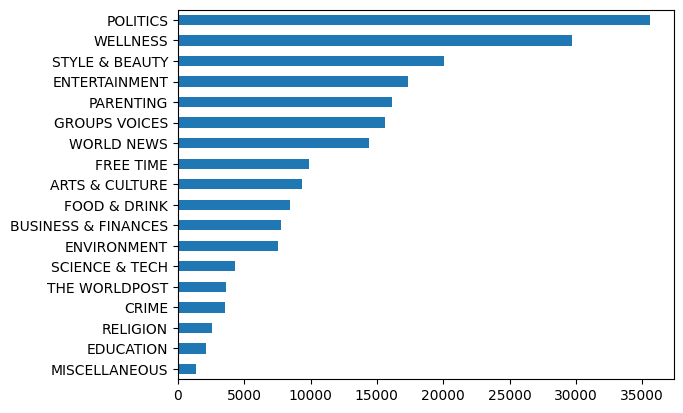

In [58]:
news_dataset.category.value_counts().sort_values(ascending=True).plot.barh()